<a href="https://colab.research.google.com/github/mateus-abrantes/Treinamento-de-uma-Rede-SOM/blob/main/REDE_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOM (Self-Organizing Map)

O objetivo deste exemplo é treinar um modelo não-supervisionado para visualizar os perfis de alunos de uma [base de dados aleatoria](http://roycekimmons.com/tools/generated_data/exams), que tem como valores de interesse os resultados dos exames em matematica, leitura e escrita dos estudantes.






## Carregando os dados

In [26]:
import pandas as pd
dataSet = pd.read_csv("https://raw.githubusercontent.com/mateus-abrantes/Treinamento-de-uma-Rede-SOM/main/StudentsPerformance.csv")

In [27]:
dataSet.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
dataSet.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
X_train = dataSet.iloc[:,5:8].values

print(X_train[1,:])

[69 90 88]


In [30]:
[row, col] = X_train.shape 
print(row," ", col) 

1000   3


## Treinamento 

In [31]:
!pip install minisom 

In [32]:
tamanhoXdaRede = 3 
tamanhoYdaRede = 3 

qtCaracteristicas = col
from minisom import MiniSom 

som = MiniSom(x = tamanhoXdaRede, y = tamanhoYdaRede, input_len = qtCaracteristicas, sigma = 1.0, learning_rate = 0.4  ) 


In [33]:
som.pca_weights_init(X_train) 
som.train_random(data = X_train, num_iteration = 80000)

## Visualização do treinamento 

In [36]:
import matplotlib.pyplot as plt
import numpy as np
# Obtem o vetor de pesos da rede treinada 
pesos = som.get_weights()

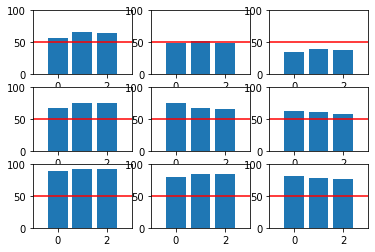

In [37]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(qtCaracteristicas)
for row in pesos:
  for elem in row:
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    plt.axis([-1, 3, 0, 100])
    plt.bar(x, elem)
    plt.plot([-1,3],[50,50],'r')
plt.show()
#plt.savefig("test_som.jpg", dpi=150)

In [39]:
def mostraNeuronio(linha,coluna): 
  # Mostra um peso 
  x = ['math','reading', 'writing']
  plt.plot([-1,3],[50,50],'r')
  plt.axis([-1, 3, 0, 100])
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

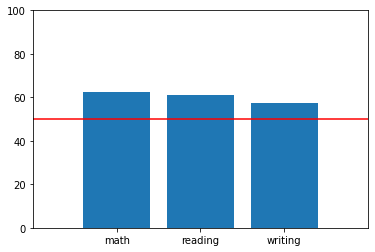

In [40]:
mostraNeuronio(1,2)

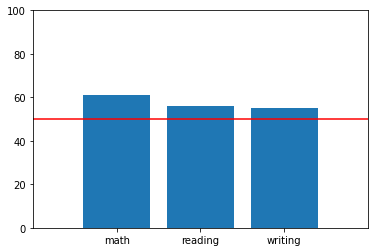

In [24]:
mostraNeuronio(0,0)

# Resultados
Com a rede Som foi possivel verificar os perfis dos estudantes em relação aos três tipos de exames, e com isso e possivel identicar por exemplo estudantes que são bons em matemática e tem desempenho menor em leitura e escrita, como tambem de estudantes que são bons em matemática e leitura, mas não tanto em leitura se comparado aos outros dois. Com isso podemos dizer que a rede Som foi uma ferramenta muito propicia para verificação de perfis e com isso possibilitar analise de forma prática e eficiente.